
Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd

import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing Skin Cancer Data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/CNN_assignment.zip" -d "/content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN"

Archive:  /content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/CNN_assignment.zip
  inflating: /content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/My Drive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  

In [6]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [16]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2239 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    subset="training",
    image_size=(img_height,img_width),
    validation_split=0.2, 
    seed=123,
    shuffle=True,
    batch_size=batch_size,
    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    subset="validation",
    image_size=(img_height,img_width),
    validation_split=0.2, 
    seed=123,
    shuffle=True,
    batch_size=batch_size,
    )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data


In [11]:
from glob import glob

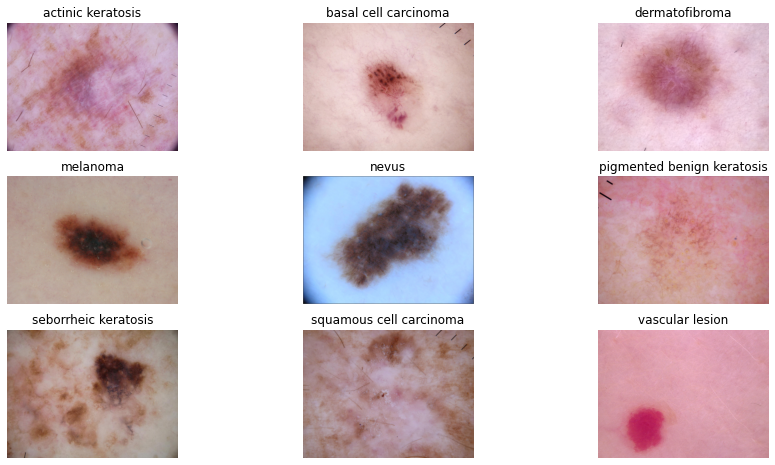

In [ ]:
fig = plt.figure(figsize=(15,8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = plt.imread(glob(os.path.join(data_dir_train,class_names[i],'*.jpg'))[1])
    plt.title(class_names[i])
    plt.axis("off")
    plt.imshow(image)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
## Just for info in case we want X_train and y_train

# X_train = np.array([images for images,labels in train_ds])
# y_train = np.array([labels for images,labels in train_ds])
# print("X_train shape",X_train.shape)
# print("y_train shape",y_train.shape)

## Another approach of Rescaling
#normalization_layer = layers.Rescaling(1./255)
#normalised_train_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))

As training set is having 1792 data point, training data will have 56 batches where each batch consists of 32 data points

In [13]:
num_classes = len(class_names)

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 149ms/step - loss: 2.1391 - accuracy: 0.2104 - val_loss: 1.9851 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 8s 139ms/step - loss: 1.9041 - accuracy: 0.2941 - val_loss: 1.7897 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 8s 139ms/step - loss: 1.6688 - accuracy: 0.4029 - val_loss: 1.6316 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 8s 139ms/step - loss: 1.4983 - accuracy: 0.4766 - val_loss: 1.6378 - val_accuracy: 0.3982
Epoch 5/20
56/56 [==============================] - 8s 139ms/step - loss: 1.3734 - accuracy: 0.5195 - val_loss: 1.3922 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 8s 139ms/step - loss: 1.2701 - accuracy: 0.5485 - val_loss: 1.4605 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 8s 139ms/step - loss: 1.2043 - accuracy: 0.5681 - val_loss: 1.4126 - val_accuracy: 0.5302
Epoch

### Visualizing training results

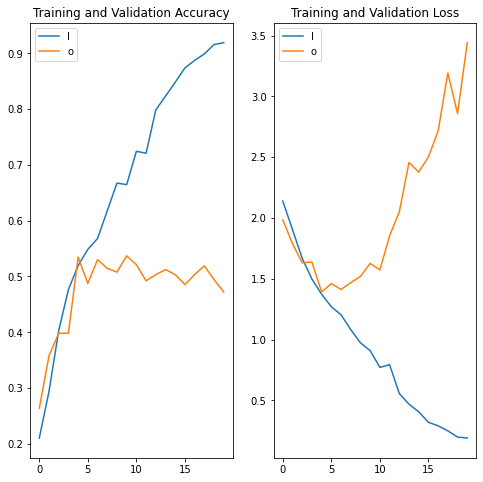

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_ranges = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_ranges, acc, label='Training Accuracy')
plt.plot(epoch_ranges, val_acc, label='Validation Accuracy')
plt.legend('lower_right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_ranges, loss, label='Training Loss')
plt.plot(epoch_ranges, val_loss, label='Validation Loss')
plt.legend('lower_right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
- Difference between training and validation accuracy is higher and this is the sign of overfitting. 


### Solutions
- As smaller data set is one of the cause of Overfitting, we will use Data Augmentation for generating more data from the existing ones
- Introduce Dropout layer for regularization of the network

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
     layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
     layers.RandomRotation(0.2),
     layers.RandomZoom(0.1)
    ]
)

### Create the model, compile and train the model with Data Augmentation and Droput layer


In [ ]:
model_data_augmantation = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)

])

In [ ]:
model_data_augmantation.compile(optimizer='adam',
                                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                metrics=['accuracy']
              )

In [ ]:
model_data_augmantation.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_39 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 90, 90, 64)        18496     
                                                     

In [ ]:
epochs = 30  # we can go beyond 30 to get higher accuaracy, but less computational power s constraint
history=model_data_augmantation.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 9s 158ms/step - loss: 2.0305 - accuracy: 0.2115 - val_loss: 2.0180 - val_accuracy: 0.2304
Epoch 2/30
56/56 [==============================] - 8s 147ms/step - loss: 1.9098 - accuracy: 0.2863 - val_loss: 1.8106 - val_accuracy: 0.3535
Epoch 3/30
56/56 [==============================] - 8s 147ms/step - loss: 1.7804 - accuracy: 0.3549 - val_loss: 1.6419 - val_accuracy: 0.4049
Epoch 4/30
56/56 [==============================] - 8s 147ms/step - loss: 1.6312 - accuracy: 0.4118 - val_loss: 1.6003 - val_accuracy: 0.4206
Epoch 5/30
56/56 [==============================] - 8s 147ms/step - loss: 1.5916 - accuracy: 0.4425 - val_loss: 1.5338 - val_accuracy: 0.4385
Epoch 6/30
56/56 [==============================] - 8s 148ms/step - loss: 1.5168 - accuracy: 0.4693 - val_loss: 1.4862 - val_accuracy: 0.4676
Epoch 7/30
56/56 [==============================] - 8s 148ms/step - loss: 1.4640 - accuracy: 0.4955 - val_loss: 1.4398 - val_accuracy: 0.5168
Epoch 

### Visualizing training results

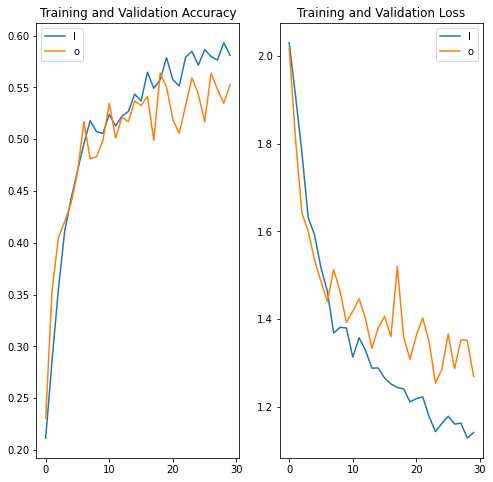

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_ranges = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_ranges, acc, label='Training Accuracy')
plt.plot(epoch_ranges, val_acc, label='Validation Accuracy')
plt.legend('lower_right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_ranges, loss, label='Training Loss')
plt.plot(epoch_ranges, val_loss, label='Validation Loss')
plt.legend('lower_right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
- After data augmentation and Dropout layer, overfitting is less compared to previous model. However, accuracy is not upto the mark


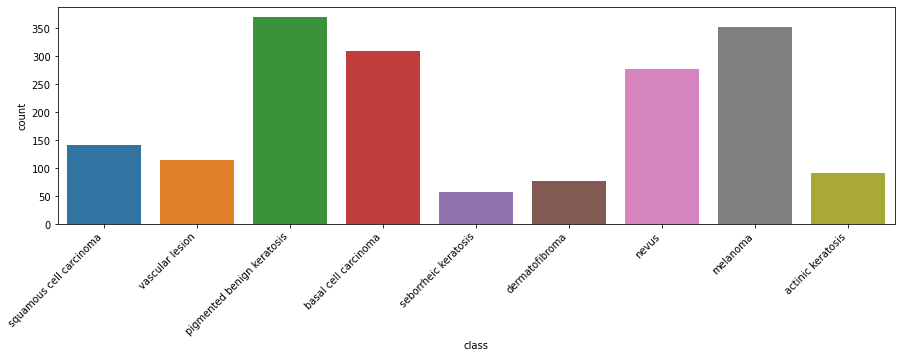

In [14]:
total_counts = list(np.concatenate([y for x,y in train_ds]))
unique_counts = {class_names[i] : total_counts.count(i) for i in list(total_counts)}

df = pd.DataFrame(unique_counts.items(), columns=['class', 'count'])

plt.figure(figsize=(15,4))
sns.barplot(data=df,x='class', y='count')
plt.xticks(rotation=45, ha="right")
plt.show()

In [17]:
df['percent'] = round(df['count']/image_count_train * 100,2)
df

,class,count,percent
0,squamous cell carcinoma,142,6.34
1,vascular lesion,115,5.14
2,pigmented benign keratosis,370,16.53
3,basal cell carcinoma,309,13.80
4,seborrheic keratosis,58,2.59
5,dermatofibroma,77,3.44
6,nevus,277,12.37
7,melanoma,352,15.72
8,actinic keratosis,92,4.11


### Findings
 - seborrhetic keratosis class has least number of samples
 - melanoma, pigmented benign keratosis, basal cell carcinoma, nevus classes are dominating in data sets 

 We will rectify class imbalances by `Augmentor`

In [18]:
!pip install Augmentor

In [19]:
import Augmentor

path_to_training_dataset= "/content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset + i)
  p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500) 
  ## We are adding 500 samples per class to make sure that none of the classes are sparse.
  ## The probability parameter controls how often the operation is applied. 

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F57C90E8150>: 100%|██████████| 500/500 [00:24<00:00, 20.56 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5830134F90>: 100%|██████████| 500/500 [00:29<00:00, 16.98 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5830101350>: 100%|██████████| 500/500 [00:30<00:00, 16.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F584352F550>: 100%|██████████| 500/500 [01:54<00:00,  4.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5830096190>: 100%|██████████| 500/500 [01:33<00:00,  5.36 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5830051250>: 100%|██████████| 500/500 [00:22<00:00, 22.53 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5840EBA2D0>: 100%|██████████| 500/500 [00:49<00:00, 10.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F584357E250>: 100%|██████████| 500/500 [00:21<00:00, 23.05 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma Detection CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5830043890>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob

path_list_new = [x for x in glob(os.path.join(data_dir_train,'*','output','*.jpg'))]
path_list_new

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train,'*','output','*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new,lesion_list_new))


In [ ]:
df2 = pd.DataFrame(dataframe_dict_new.items(), columns=['Path','Label'])
df2.head()

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis


In [ ]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

###  Train the model on the data created using Augmentor

In [20]:
batch_size = 32
img_height = 180
img_width = 180

#### Creating train and validation dataset

Use 80% of the images for training, and 20% for validation.

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    subset="training",
    image_size=(img_height,img_width),
    validation_split=0.2, 
    seed=123,
    shuffle=True,
    batch_size=batch_size,
    )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    subset="validation",
    image_size=(img_height,img_width),
    validation_split=0.2, 
    seed=123,
    shuffle=True,
    batch_size=batch_size,
    )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [23]:
model_with_augmentor = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.20),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.20),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model_with_augmentor.compile(optimizer='adam',
                            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy']
              )

In [25]:
input_shape = (None, 180, 180, 3) 
model_with_augmentor.build(input_shape)
model_with_augmentor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

In [26]:
epochs = 30
history=model_with_augmentor.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 58s 264ms/step - loss: 2.1322 - accuracy: 0.2055 - val_loss: 1.7485 - val_accuracy: 0.3653
Epoch 2/30
169/169 [==============================] - 44s 254ms/step - loss: 1.6042 - accuracy: 0.3895 - val_loss: 1.4309 - val_accuracy: 0.4677
Epoch 3/30
169/169 [==============================] - 44s 251ms/step - loss: 1.3859 - accuracy: 0.4853 - val_loss: 1.4469 - val_accuracy: 0.4618
Epoch 4/30
169/169 [==============================] - 45s 258ms/step - loss: 1.2631 - accuracy: 0.5401 - val_loss: 1.2211 - val_accuracy: 0.5449
Epoch 5/30
169/169 [==============================] - 45s 260ms/step - loss: 1.0980 - accuracy: 0.5966 - val_loss: 1.2154 - val_accuracy: 0.5509
Epoch 6/30
169/169 [==============================] - 45s 261ms/step - loss: 0.9578 - accuracy: 0.6500 - val_loss: 1.0955 - val_accuracy: 0.5999
Epoch 7/30
169/169 [==============================] - 45s 256ms/step - loss: 0.8757 - accuracy: 0.6834 - val_loss: 0.9984 - val_ac

### Visualizing training results

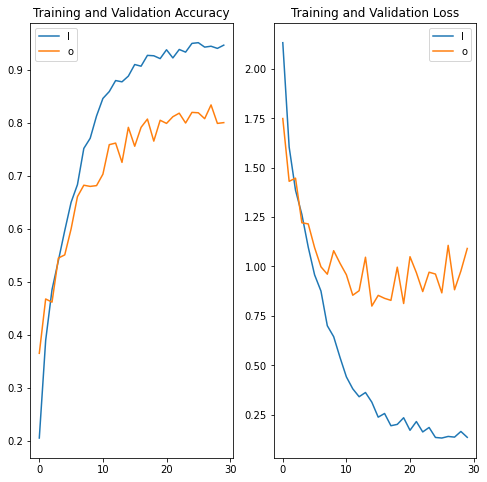

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_ranges = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_ranges, acc, label='Training Accuracy')
plt.plot(epoch_ranges, val_acc, label='Validation Accuracy')
plt.legend('lower_right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_ranges, loss, label='Training Loss')
plt.plot(epoch_ranges, val_loss, label='Validation Loss')
plt.legend('lower_right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
- After augmentation, overfitting is less compared to first model(without Dropout and Data augmentation) and class rebalance helped to achieve higher accuracy
